In [2]:
# importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import base64

In [2]:
# !ls data

In [4]:
CALLS_DATASET = "data/call_in_progress_Jan1_2018_24Sep_2018.csv"
DURATION_DATASET = "data/call_duration_Jan1_2018_24Sep_2018.csv"
FRAUD_DATASET = "data/fraudcalls_Jan1_2018_24Sep_2018.csv"

In [5]:
#loading datasets

calls = pd.read_csv(CALLS_DATASET)
fraudcalls = pd.read_csv(FRAUD_DATASET)
callduration = pd.read_csv(DURATION_DATASET)

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# convert time 
calls['_time'] = pd.to_datetime(calls._time)
fraudcalls['_time'] = pd.to_datetime(fraudcalls._time)
#drop duplicates
calls.drop_duplicates(subset="vsg_tid",inplace=True)
callduration.drop_duplicates(subset="vsg_tid",inplace=True)

In [7]:
calls.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS


In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571578 entries, 0 to 2571767
Data columns (total 9 columns):
_time                datetime64[ns]
intuit_tid           object
vsg_tid              object
intuit_appid         object
intuit_offeringid    object
Called               object
ToState              object
ToZip                object
ToCity               object
dtypes: datetime64[ns](1), object(8)
memory usage: 196.2+ MB


In [8]:
df = pd.merge(calls, callduration, how="left",on="vsg_tid")

In [20]:
calls.ToState.value_counts()[:100]

CA                                    48177
TX                                    30450
FL                                    28456
NY                                    23408
IL                                    12603
PA                                    12478
GA                                    10758
CO                                    10327
NJ                                     9742
MI                                     9472
OH                                     9044
NC                                     8989
WA                                     8948
VA                                     8907
MA                                     7954
ON                                     7931
AZ                                     7351
MD                                     7181
MN                                     6173
MO                                     5811
TN                                     5510
OR                                     5466
WI                              

In [34]:
df.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,10.0
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA,27.0
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN,27.0
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA,26.0
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS,15.0


In [22]:
calls

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS
5,2018-05-31 02:56:24.021,6ff1499c-89dc-4ac5-86f5-fb4acf74bad8,e5f6e7fc-8f81-4f3a-a0b2-dd1614069e6f,Intuit.cto.iam.ius,Intuit.cg.myturbotax,KzEzMTM4MjY0ODEz,MI,48209,DETROIT
6,2018-05-31 02:05:17.046,392ba5d0-f7d1-447f-b836-8d61de8c586f,8350c788-79a9-4583-9389-2023de9b18cc,Intuit.cto.iam.ticket,Intuit.cg.myturbotax,KzE3NzA1Mzk1NjI2,GA,30564,GAINESVILLE
7,2018-05-31 02:04:54.882,f5c0265d-9364-4ce9-aeee-27ebe7ea2382,f4511a33-6770-4472-bd4a-ca122afca860,Intuit.cto.iam.ticket,Intuit.cg.myturbotax,KzE0MTA2OTg1NzEy,MD,21051,FORK
8,2018-05-31 01:56:08.217,e1b915fb-1669-4f6d-beae-e6498fd23bd8,6f6b8541-6273-438b-89de-0afefc4d4fbe,Intuit.cto.iam.ius,Intuit.platform.estore101.quickbooks,KzEzMDU2MzQwNzY3,FL,33127,MIAMI
9,2018-05-31 01:44:23.696,86db8049-9ac0-4d07-8cf5-b24418af547f,075a1500-eaec-40ee-a473-7b421dc71769,Intuit.cto.iam.ius,Intuit.cg.myturbotax,KzEyMjgyMTkzMzQw,MS,39562,PASCAGOULA


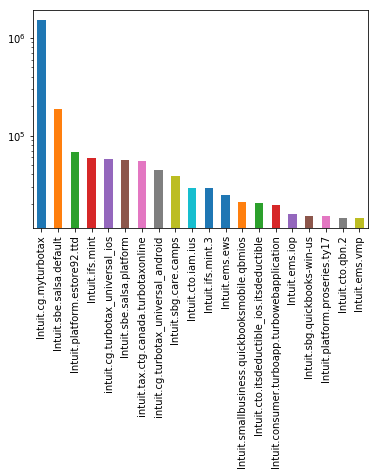

In [45]:
fig, ax = plt.subplots()
calls['intuit_offeringid'].value_counts()[:20].plot(ax=ax, kind='bar')
plt.yscale('log')

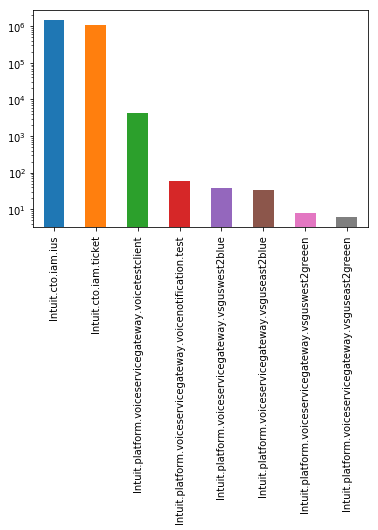

In [46]:
fig, ax = plt.subplots()
calls['intuit_appid'].value_counts().plot(ax=ax, kind='bar')
plt.yscale('log')

In [26]:
fraudcalls.shape

(7361, 4)

In [49]:
df.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,10.0
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA,27.0
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN,27.0
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA,26.0
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS,15.0


In [51]:
import plotly.plotly as py

In [66]:
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['ToState'],
        z = df['Duration'].astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

/anaconda2/lib/python2.7/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda2/lib/python2.7/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [9]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [10]:
print __version__

3.2.1


In [11]:
import plotly.graph_objs as go

plot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'file:///Users/bvatti/Desktop/Projects/Voice_Fraud_detection/temp-plot.html'

In [12]:
init_notebook_mode(connected=True)

In [61]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])


In [13]:
import plotly.graph_objs as go

import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)


In [14]:
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

In [16]:
import plotly.plotly as py

fig = py.get_figure('https://plot.ly/~jackp/8715', raw=True)
iplot(fig)

In [21]:
df.Called.value_counts()

KzE3MjAyNzk4NzI1    1324
KzE5MDQzNDc1NTUy    1320
KzEzMDM4NDcwMDMz     897
KzE3MjAzODEyNjgx     854
KzEyMTU4ODM4MDE4     776
KzE0MTU4MTgxNDgy     774
KzE0MTU5OTE0Nzg3     773
KzE4MTAyMDIwMzM0     773
KzE0MTU5MzY3MTE5     772
KzE1MTIyNTgxNjM4     738
KzE3MjAyNzk4NzI0     694
KzEzNjE1ODU3NjY4     692
KzE4MjgyNTY0OTU1     655
KzE2MjY4MjI4MDMz     492
KzEyMTM0ODgxNzQ3     482
KzE1NDE1NDgxOTg2     472
KzE2MTg1NDI2MDE5     447
KzE5MTIzODQ5MTMw     426
KzE2MTkyNTU0NjYw     420
KzE0MDQ0NjIyODU2     416
KzE0NjkyMjI3NDE4     410
KzE1NzA3MzA5MjMy     406
KzE3MjAzODE0Mjcw     390
KzEzMDM4MDA4MTIw     381
KzE3MTM5ODg5MDY2     379
KzE1MTA1NjA5NTA4     364
KzE3MTQ1MzgyMzkz     360
KzE4MDY4OTMxNTE2     350
KzE5MTA3MDU5Njk1     343
KzE4MTc3OTc3NzQw     343
                    ... 
KzEzMDgzMzgzNTI3       1
KzEyNTY2ODQ3Njcz       1
KzE2NjIyNTE2MjYx       1
KzE4NTAzMjIyNjYy       1
KzE3NzA4OTg4NTA2       1
KzE3MDQyNzgwMDEx       1
KzE3MTg2Nzk0Njgy       1
KzEyMDQ1MDQ3ODYw       1
KzE1ODUzODE4MjA1       1


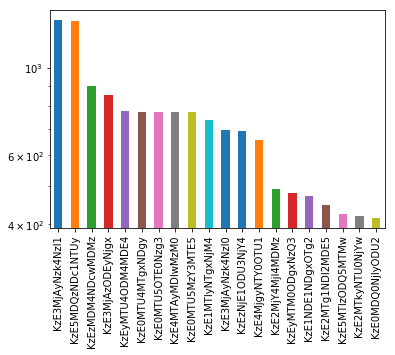

In [12]:
fig, ax = plt.subplots()
df.Called.value_counts()[0:20].plot(ax=ax, kind='bar')
plt.yscale('log')

In [15]:
df.Called.value_counts().index[0]

'KzE3MjAyNzk4NzI1'

In [18]:
df.Called

0          KzkxOTc0MTAwNDEwMA==
1              KzEyNTM3NTI3NTI4
2          KzkxOTAzMDMyNDg3Mw==
3              KzE5MDgzMzYyNTk2
4              KzE5MTQzOTYwNTU4
5              KzEzMTM4MjY0ODEz
6              KzE3NzA1Mzk1NjI2
7              KzE0MTA2OTg1NzEy
8              KzEzMDU2MzQwNzY3
9              KzEyMjgyMTkzMzQw
10             KzE4MTkzMjY3NjE5
11             KzE3NjM2MDAxNDAy
12             KzE0MDg1OTQ1NTc3
13             KzEzMTAzMjYzOTYy
14             KzEyMDYzMjU0NTI2
15             KzE0MDQ0NjIyODU2
16             KzE3MjQ4MDI3OTk4
17             KzE0MDY0NDM2NTM4
18             KzEzMDc1ODc1MzEw
19             KzE1NzA2MjkwNjEw
20             KzE1NzA3NTI4NzE1
21             KzEyNTIyNjYwNTcx
22             KzE1MjA2NjQyMjEw
23             KzE2MTU1OTM5NzE0
24             KzEyMTAyNTgyMTAw
25             KzE5MDk5NDkxMTgx
26             KzE2NjE3MjE3NTg4
27             KzE3MTI0NzIyNTAx
28             KzE5NzA0ODQ3MDQw
29             KzE3MTk0ODE2NDI1
                   ...         
2571548 

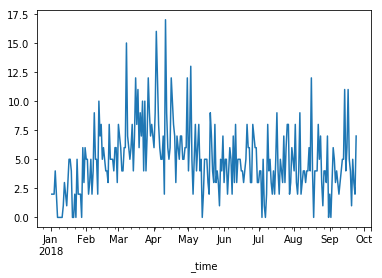

In [19]:
(df[df.Called == df.Called.value_counts().index[1]].set_index("_time")['Called'].resample('D').agg(np.count_nonzero).plot())

In [20]:
df

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,10.0
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA,27.0
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN,27.0
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA,26.0
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS,15.0
5,2018-05-31 02:56:24.021,6ff1499c-89dc-4ac5-86f5-fb4acf74bad8,e5f6e7fc-8f81-4f3a-a0b2-dd1614069e6f,Intuit.cto.iam.ius,Intuit.cg.myturbotax,KzEzMTM4MjY0ODEz,MI,48209,DETROIT,27.0
6,2018-05-31 02:05:17.046,392ba5d0-f7d1-447f-b836-8d61de8c586f,8350c788-79a9-4583-9389-2023de9b18cc,Intuit.cto.iam.ticket,Intuit.cg.myturbotax,KzE3NzA1Mzk1NjI2,GA,30564,GAINESVILLE,27.0
7,2018-05-31 02:04:54.882,f5c0265d-9364-4ce9-aeee-27ebe7ea2382,f4511a33-6770-4472-bd4a-ca122afca860,Intuit.cto.iam.ticket,Intuit.cg.myturbotax,KzE0MTA2OTg1NzEy,MD,21051,FORK,26.0
8,2018-05-31 01:56:08.217,e1b915fb-1669-4f6d-beae-e6498fd23bd8,6f6b8541-6273-438b-89de-0afefc4d4fbe,Intuit.cto.iam.ius,Intuit.platform.estore101.quickbooks,KzEzMDU2MzQwNzY3,FL,33127,MIAMI,30.0
9,2018-05-31 01:44:23.696,86db8049-9ac0-4d07-8cf5-b24418af547f,075a1500-eaec-40ee-a473-7b421dc71769,Intuit.cto.iam.ius,Intuit.cg.myturbotax,KzEyMjgyMTkzMzQw,MS,39562,PASCAGOULA,26.0
